In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
import astropy
import sys
from matplotlib.path import Path
import emcee
import corner

In [8]:
xbinsize = 0.05
ybinsize = 0.1
xbins = np.arange( start = -1, stop = 2+xbinsize, step = xbinsize)
ybins = np.arange( start = 14, stop = 24+ybinsize, step = ybinsize)

# Respectively u,g,r,i,z. Ex: u0 = u - 4.239*E(B-V)
extinction_coeff_sdss = np.array([4.239, 3.303, 2.285, 1.698, 1.263])
# Respectively u,g,r,i,z,Y. Ex: A_u = R_u*EBV_SFD98 ; u0 = u - A_u
extinction_coeff_decam = np.array([3.9631, 3.1863, 2.1401, 1.5690, 1.1957, 1.0476])

In [2]:
def read_fits (name):
    hdulist = fits.open(name)
    field_data = hdulist[1].data
    header = hdulist[1].header
    hdulist.close()
    return field_data

In [5]:
def dereddener(mag, filter_index, EBV, field_number, filterset = 'decam'):

    if field_number == '5' or field_number == '6' or field_number == '9' or field_number == '10' or field_number == '11':
        EBV[np.where(EBV > 0.3)] = 0.037 #This line is to ensure we don't have unrealistic extinction values in the SMC centre. The limit is debatable.
    if filterset == 'decam':
        return mag - extinction_coeff_decam[filter_index]*EBV
    else:
        return mag - extinction_coeff_sdss[filter_index]*EBV

In [3]:
data = read_fits('/scratch/SMASH_DATA/SMC_contiguous_catalogue/combined_fields_allobj_largeG_02_error.fits')

In [11]:
mag_g = dereddener(data['G'], 1, data['EBV'], 'NA')
mag_i = dereddener(data['I'], 3, data['EBV'], 'NA')
colours = mag_g - mag_i
cmd_points = np.array([colours, mag_g])

In [16]:
rgb_vertexs = np.array([(0.75,23),(1,20.3),(1.4,18.5),(2,17.5),(2,16.5),(0.9,18),(0.5,18),(0.5,19),(0.4,19),(0.4,20),(0.5,20),(0.5,20.5),(0.3,20.5),(0.75,23)])
rgb_path = Path(rgb_vertexs)

In [13]:
rgb_mask = rgb_path.contains_points(cmd_points.T)

In [15]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [45]:
def cmd_plotter(mag_g, mag_i):
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.rcParams.update({'font.size':10})
    fig = plt.figure(1, figsize=(8,8))
    ax = fig.add_subplot(111)

    counts, xedges, yedges, imag = ax.hist2d(mag_g - mag_i, mag_g, bins = [xbins, ybins], cmin = 1, zorder = 1, 
                                             cmap='Greys', norm=colors.LogNorm(), label = 'SMASH', rasterized=True)
    vertex_list = [list(x) for x in rgb_vertexs]
    vertex_array = np.array(vertex_list)
    polygon = matplotlib.patches.Polygon(vertex_array, edgecolor = 'black', fill=False, linestyle = '-', linewidth = 2.)
    ax.add_patch(polygon)
    ax.set_xlabel('$g-i$')
    ax.set_ylabel('$g$')
    plt.gca().invert_yaxis()
    plt.minorticks_on()
    plt.colorbar(imag, orientation = 'horizontal', panchor=(0.5, 0.0), aspect=90)
    plt.show()

/user/HS128/pm00518/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


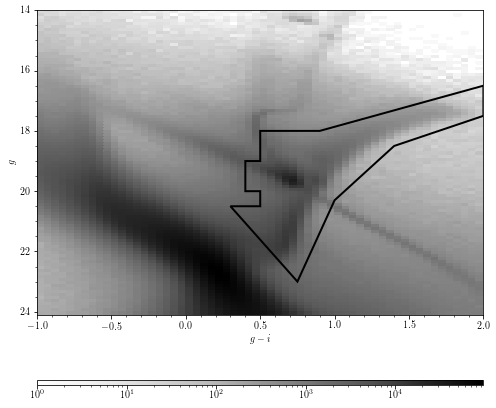

In [46]:
cmd_plotter(mag_g, mag_i)

In [22]:
u_rgb = data['U'][rgb_mask]
g_rgb = data['G'][rgb_mask]
r_rgb = data['R'][rgb_mask]
i_rgb = data['I'][rgb_mask]
z_rgb = data['Z'][rgb_mask]

In [42]:
colourbinsize = 0.01
colour_bins = np.arange( start = 0.1, stop = 6+xbinsize, step = colourbinsize)
gibinsize = 0.01
gi_bins = np.arange( start = 0.3, stop = 2+xbinsize, step = gibinsize)

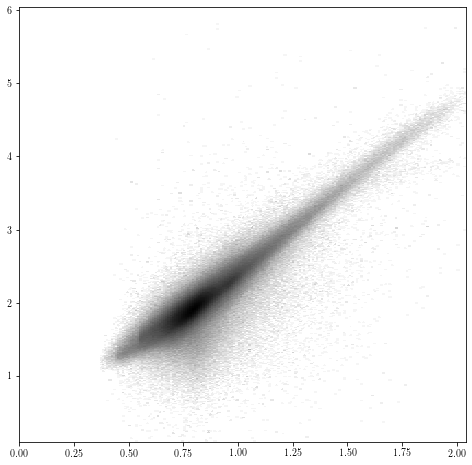

In [44]:
plt.figure(figsize=(8,8))
plt.hist2d(g_rgb-i_rgb, u_rgb-r_rgb, cmap='Greys', bins=[gi_bins,colour_bins], norm=colors.LogNorm())
plt.xlim(xmin=0)
plt.show()